In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, os.path
import pickle

from matplotlib.pyplot import figure

figsize=(5, 3)

In [31]:
columns = [
    'AGENT_ID',
    'NTH_EPISODE',
    'STEPS_TAKEN',
    'TOTAL_REWARD',
    'MOVING_AVERAGE_REWARD',
    'SOLVED',
]

path, dirs, files = next(os.walk("./data"))
n_agents_ddpg = len(files)

print(n_agents_ddpg)
ddpg_agent_dfs = []
for agent_id in range(n_agents_ddpg):
    ddpg_agent_dfs.append(pd.read_pickle('./data/data_ddpg_agent{}.pk1'.format(agent_id)).reset_index(drop=True))

solved_ddpg = []
not_solved_ddpg = []
for agent_id in range(n_agents_ddpg):
    if ddpg_agent_dfs[agent_id][ddpg_agent_dfs[agent_id]['SOLVED'] == 1].empty:
        not_solved_ddpg.append(agent_id)
    else:
        solved_ddpg.append(agent_id)

number_solved = len(solved_ddpg)

percentage_solved_ddpg = (number_solved/n_agents_ddpg)*100

print("{}% Solved".format(percentage_solved_ddpg))

20
90.0% Solved


In [32]:
path, dirs, files = next(os.walk("./data_initial_test"))
n_agents_per = len(files)

print(n_agents_per)
per_agent_dfs = []
for agent_id in range(n_agents_per):
    print(agent_id)
    per_agent_dfs.append(pd.read_pickle('./data_initial_test/data_ddpg_agent{}.pk1'.format(agent_id)).reset_index(drop=True))

solved_per = []
not_solved_per = []
for agent_id in range(n_agents_per):
    if per_agent_dfs[agent_id][per_agent_dfs[agent_id]['SOLVED'] == 1].empty:
        not_solved_per.append(agent_id)
    else:
        solved_per.append(agent_id)

number_solved = len(solved_per)

percentage_solved_per = (number_solved/n_agents_per)*100

print("{}% Solved".format(percentage_solved_per))

3
0
1
2
100.0% Solved


In [33]:
path, dirs, files = next(os.walk("./data_td3"))
n_agents_td3 = len(files)

print(n_agents_td3)
td3_agent_dfs = []
for agent_id in range(n_agents_td3):
    print(agent_id)
    td3_agent_dfs.append(pd.read_pickle('./data_td3/data_ddpg_agent{}.pk1'.format(agent_id)).reset_index(drop=True))

solved_td3 = []
not_solved_td3 = []
for agent_id in range(n_agents_td3):
    if td3_agent_dfs[agent_id][td3_agent_dfs[agent_id]['SOLVED'] == 1].empty:
        not_solved_td3.append(agent_id)
    else:
        solved_td3.append(agent_id)

number_solved = len(solved_td3)

percentage_solved_td3 = (number_solved/n_agents_td3)*100

print("{}% Solved".format(percentage_solved_td3))

20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
85.0% Solved


2
3
4
5
6
7
8
9
12
13
14
15
16
17
18
19


72.74016037945918

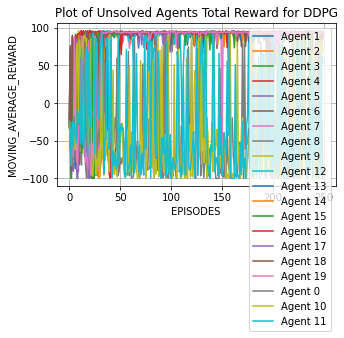

In [34]:
for agent_id in solved_td3 + not_solved_td3:
    ax = td3_agent_dfs[agent_id]['TOTAL_REWARD'].plot(
        label = "Agent " + str(agent_id),
        legend=True,
        figsize=figsize,
        grid = True,
        title = "Plot of Unsolved Agents Total Reward for DDPG"
    )
    ax.set_xlabel("EPISODES")
    ax.set_ylabel("MOVING_AVERAGE_REWARD")

ax.get_figure().savefig("./Plots/LearningCurveFailed.png")

td3_mean_reward = pd.DataFrame(td3_agent_dfs[0]['TOTAL_REWARD'])
td3_mean_steps = pd.DataFrame(td3_agent_dfs[0]['STEPS_TAKEN'])

for agent_id in solved_td3[1:]:
    print(agent_id)
    name = 'TOTAL_REWARD' + str(agent_id)
    name1 = 'STEPS_TAKEN' + str(agent_id)
    td3_mean_reward[name] = pd.DataFrame(td3_agent_dfs[agent_id]['TOTAL_REWARD'])
    td3_mean_steps[name1] = pd.DataFrame(td3_agent_dfs[agent_id]['STEPS_TAKEN'])

td3_mean_reward['mean_total_reward'] = td3_mean_reward.mean(axis=1)
td3_mean_steps['mean_total_steps'] = td3_mean_steps.mean(axis=1)

td3_mean_reward['mean_total_reward'].mean()

2
3
4
5
7
8
9
10
11
12
13
14
15
16
17
18
19


80.74910369161307

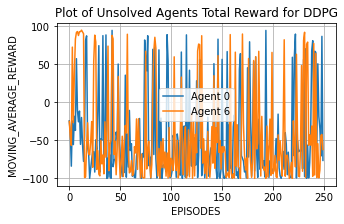

In [35]:
for agent_id in not_solved_ddpg:
    ax = ddpg_agent_dfs[agent_id]['TOTAL_REWARD'].plot(
        label = "Agent " + str(agent_id),
        legend=True,
        figsize=figsize,
        grid = True,
        title = "Plot of Unsolved Agents Total Reward for DDPG"
    )
    ax.set_xlabel("EPISODES")
    ax.set_ylabel("MOVING_AVERAGE_REWARD")

ax.get_figure().savefig("./Plots/LearningCurveFailed.png")

ddpg_mean_reward = pd.DataFrame(ddpg_agent_dfs[0]['TOTAL_REWARD'])
ddpg_mean_steps = pd.DataFrame(ddpg_agent_dfs[0]['STEPS_TAKEN'])

for agent_id in solved_ddpg[1:]:
    print(agent_id)
    name = 'TOTAL_REWARD' + str(agent_id)
    name1 = 'STEPS_TAKEN' + str(agent_id)
    ddpg_mean_reward[name] = pd.DataFrame(ddpg_agent_dfs[agent_id]['TOTAL_REWARD'])
    ddpg_mean_steps[name1] = pd.DataFrame(ddpg_agent_dfs[agent_id]['STEPS_TAKEN'])

ddpg_mean_reward['mean_total_reward'] = ddpg_mean_reward.mean(axis=1)
ddpg_mean_steps['mean_total_steps'] = ddpg_mean_steps.mean(axis=1)

ddpg_mean_reward['mean_total_reward'].mean()

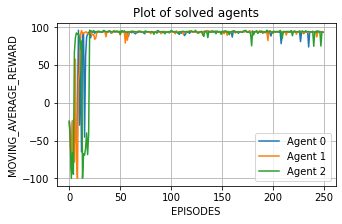

In [36]:
for agent_id in range(n_agents_per):
    ax = per_agent_dfs[agent_id]['TOTAL_REWARD'].plot(
        label = "Agent " + str(agent_id),
        legend=True,
        figsize=figsize,
        grid = True,
        title = "Plot of solved agents"
    )
    ax.set_xlabel("EPISODES")
    ax.set_ylabel("MOVING_AVERAGE_REWARD")

per_mean_reward = pd.DataFrame(per_agent_dfs[0]['TOTAL_REWARD'])
per_mean_steps = pd.DataFrame(per_agent_dfs[0]['STEPS_TAKEN'])


In [37]:
for agent_id in solved_per[1:]:
    print(agent_id)
    name = 'TOTAL_REWARD' + str(agent_id)
    name1 = 'STEPS_TAKEN' + str(agent_id)

    per_mean_reward[name] = pd.DataFrame(per_agent_dfs[agent_id]['TOTAL_REWARD'])
    per_mean_steps[name1] = pd.DataFrame(per_agent_dfs[agent_id]['STEPS_TAKEN'])

per_mean_reward['mean_total_reward'] = per_mean_reward.mean(axis=1)
per_mean_steps['mean_total_steps'] = per_mean_steps.mean(axis=1)

per_mean_reward['mean_total_reward'].mean()

1
2


86.65594044527023

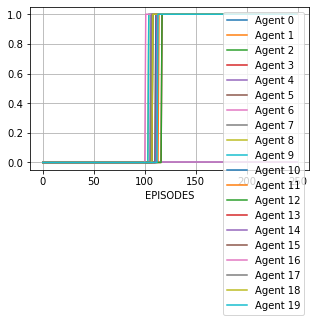

In [38]:
for agent_id in range(n_agents_ddpg):
    ax = ddpg_agent_dfs[agent_id]['SOLVED'].plot(
        label = "Agent " + str(agent_id),
        legend = True,
        figsize=figsize,
        grid = True
    )

    ax.set_xlabel("EPISODES")

In [39]:
ddpg_agent_dfs[1][ddpg_agent_dfs[1]['TOTAL_REWARD'] == min(ddpg_agent_dfs[1]['TOTAL_REWARD'])]

,AGENT_ID,NTH_EPISODE,STEPS_TAKEN,TOTAL_REWARD,MOVING_AVERAGE_REWARD,SOLVED
2,1.0,2.0,999.0,-89.205929,-51.628244,0.0


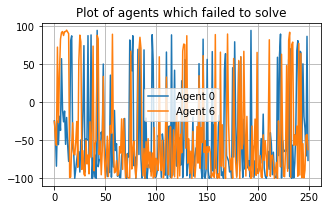

In [40]:
for agent_id in not_solved_ddpg:
    ddpg_agent_dfs[agent_id]['TOTAL_REWARD'].plot(
        label = "Agent " + str(agent_id),
        legend=True,
        figsize=figsize,
        grid = True,
        title="Plot of agents which failed to solve"
    )


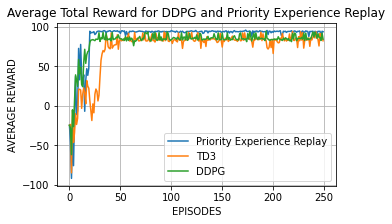

In [41]:
per_mean_reward['mean_total_reward'].plot(
    label="Priority Experience Replay",
    legend=True
)
td3_mean_reward['mean_total_reward'].plot(
    label="TD3",
    legend=True
)
ax = ddpg_mean_reward['mean_total_reward'].plot(
        figsize=figsize,
        grid = True,
        title="Average Total Reward for DDPG and Priority Experience Replay",
        label="DDPG",
        legend=True,
)

ax.set_xlabel("EPISODES")
ax.set_ylabel("AVERAGE REWARD")

ax.get_figure().savefig("./Plots/LearningCurve.png")

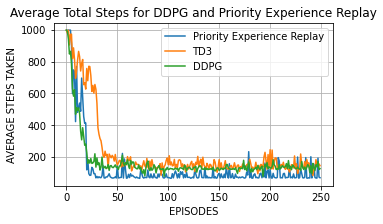

In [42]:
per_mean_steps['mean_total_steps'].plot(
    label="Priority Experience Replay",
    legend=True
)

td3_mean_steps['mean_total_steps'].plot(
    label="TD3",
    legend=True
)

ax = ddpg_mean_steps['mean_total_steps'].plot(
        figsize=figsize,
        grid = True,
        title="Average Total Steps for DDPG and Priority Experience Replay",
        label="DDPG",
        legend=True,
)

ax.set_xlabel("EPISODES")
ax.set_ylabel("AVERAGE STEPS TAKEN")

ax.get_figure().savefig("./Plots/LearningCurveSteps.png")